In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
from DataLoader import DataLoader
from FileParser import FileParser

## Author IDs vs. Author Names

In [3]:
d_train = DataLoader()
d_train.papers(
    ["2008", "2009", "2010", "2011", "2012", "2013", "2014"]).conferences().conferenceseries().abstracts().citations()
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_abstract)].index), inplace=True)
d_train.data = d_train.data.reset_index()
d_train.data.drop(
    list(d_train.data[pd.isnull(d_train.data.chapter_citations)].index), inplace=True)
d_train.data = d_train.data.reset_index()

d_validation = DataLoader()
d_validation.papers(["2015"]).conferences().conferenceseries().abstracts().citations()
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_abstract)].index), inplace=True)
d_validation.data = d_validation.data.reset_index()
d_validation.data.drop(
    list(d_validation.data[pd.isnull(d_validation.data.chapter_citations)].index), inplace=True)
d_validation.data = d_validation.data.reset_index()

d_test = DataLoader()
d_test.papers(["2016"]).conferences().conferenceseries().abstracts().citations()
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index), inplace=True)
d_test.data = d_test.data.reset_index()
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_citations)].index), inplace=True)
d_test.data = d_test.data.reset_index()

Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memory yet.
P

In [4]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(118112, 10607, 17609)

In [5]:
parser = FileParser()
chapters_authors = pd.DataFrame(
    list(parser.get_data("chapters_authors").items()), columns=["chapter", "author"])
chapters_author_names = pd.DataFrame(
    list(parser.get_data("chapters_authors_name").items()), columns=["chapter", "authors_name"])
len(chapters_authors), len(chapters_author_names)

Process 'chapters_authors' not in memory yet.
Process 'chapters_authors_name' not in memory yet.


(186760, 186760)

In [6]:
df_train = pd.merge(d_train.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_train = pd.merge(df_train, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(d_validation.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(df_validation, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(d_test.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(df_test, chapters_author_names, how="inner", on=["chapter", "chapter"])

len(df_train), len(df_validation), len(df_test)

(118112, 10607, 17609)

In [7]:
df_train["len_authors"] = df_train.author.apply(lambda x: len(x))
df_train["len_author_names"] = df_train.authors_name.apply(lambda x: len(x))
df_validation["len_authors"] = df_validation.author.apply(lambda x: len(x))
df_validation["len_author_names"] = df_validation.authors_name.apply(lambda x: len(x))
df_test["len_authors"] = df_test.author.apply(lambda x: len(x))
df_test["len_author_names"] = df_test.authors_name.apply(lambda x: len(x))

### Statistics training data

In [8]:
print("Median number of authors per chapter: {}.".format(df_train["len_authors"].median()))
print("Median number of authors per chapter: {}.".format(df_train["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_train["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_train["len_authors"].max()))

Median number of authors per chapter: 3.0.
Median number of authors per chapter: 2.903566106746139.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 24.


In [9]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(len(df_train[df_train.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 3186.


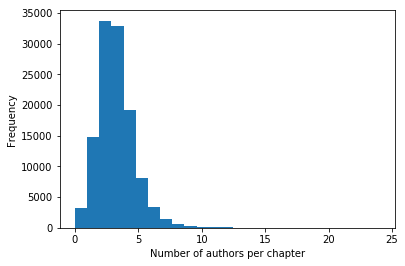

In [10]:
df_train[["len_authors"]].plot(kind="hist",bins=25)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [11]:
print("Median number of author names per chapter: {}.".format(df_train["len_author_names"].median()))
print("Median number of author names per chapter: {}.".format(df_train["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_train["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_train["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Median number of author names per chapter: 3.1506366838255215.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 29.


In [12]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_train[df_train.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


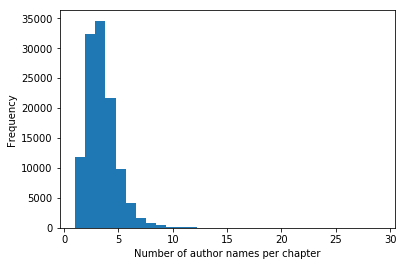

In [13]:
df_train[["len_author_names"]].plot(kind="hist",bins=30)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

### Statistics validation data

In [14]:
print("Median number of authors per chapter: {}.".format(df_validation["len_authors"].median()))
print("Median number of authors per chapter: {}.".format(df_validation["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_validation["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_validation["len_authors"].max()))

Median number of authors per chapter: 3.0.
Median number of authors per chapter: 3.0172527576128974.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 36.


In [15]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_validation[df_validation.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 307.


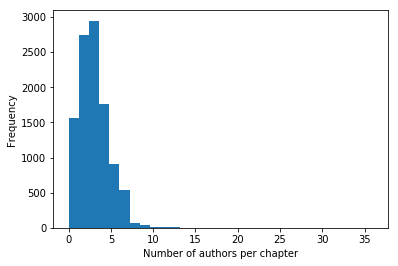

In [16]:
df_validation[["len_authors"]].plot(kind="hist",bins=30)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [17]:
print("Median number of author names per chapter: {}.".format(df_validation["len_author_names"].median()))
print("Median number of author names per chapter: {}.".format(df_validation["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_validation["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_validation["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Median number of author names per chapter: 3.319883096068634.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 57.


In [18]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_validation[df_validation.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


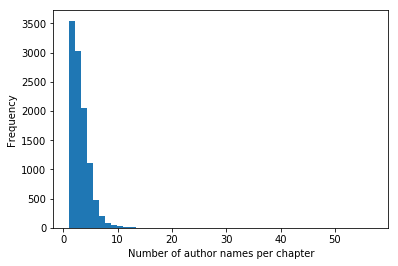

In [19]:
df_validation[["len_author_names"]].plot(kind="hist",bins=50)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

### Statistics test data

In [20]:
print("Median number of authors per chapter: {}.".format(df_test["len_authors"].median()))
print("Median number of authors per chapter: {}.".format(df_test["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_test["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_test["len_authors"].max()))

Median number of authors per chapter: 3.0.
Median number of authors per chapter: 3.0516213300017037.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 93.


In [21]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_test[df_test.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 698.


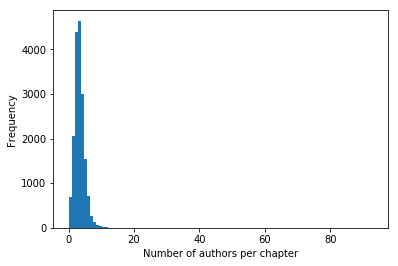

In [22]:
df_test[["len_authors"]].plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [23]:
print("Median number of author names per chapter: {}.".format(df_test["len_author_names"].median()))
print("Median number of author names per chapter: {}.".format(df_test["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_test["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_test["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Median number of author names per chapter: 3.4426145720938157.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 139.


In [24]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_test[df_test.len_author_names==0])))

Number of chapters with no disambiguated authors (no unique ID): 0.


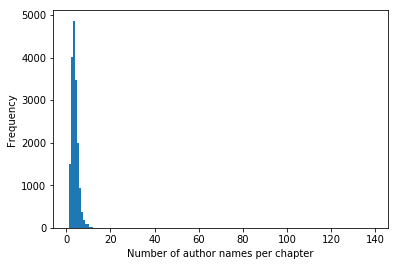

In [25]:
df_test[["len_author_names"]].plot(kind="hist",bins=150)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

## Author IDs

In [26]:
unique_author_names = []
for idx in range(len(df_train)):
    unique_author_names.extend(df_train.authors_name.iloc[idx])
len(set(unique_author_names))

168858

## Author Names